In [ ]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

# Define the stock ticker (you can change this to any S&P 500 symbol like "AAPL", "GOOGL", etc.)
ticker = "TSLA"

# Define the time period: last 150 trading days
end_date = datetime.today()
start_date = end_date - timedelta(days=220)  # approx. 150 trading days (excluding weekends)

# Download data using yfinance
df = yf.download(ticker, start=start_date, end=end_date)

# Optional: Reset index to get 'Date' column as a regular column
df.reset_index(inplace=True)

# View the first few rows
print(df.head())
# Save the data to a CSV file
csv_filename = f"{ticker}_last_150_days.csv"
df.to_csv(csv_filename, index=False)

print(f"Data saved to {csv_filename}")



YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price        Date       Close        High         Low        Open     Volume
Ticker                   TSLA        TSLA        TSLA        TSLA       TSLA
0      2024-09-03  210.600006  219.899994  209.639999  215.259995   76714200
1      2024-09-04  219.410004  222.220001  210.570007  210.589996   80651800
2      2024-09-05  230.169998  235.000000  222.250000  223.490005  119355000
3      2024-09-06  210.729996  233.600006  210.509995  232.600006  112177000
4      2024-09-09  216.270004  219.869995  213.669998  216.199997   67443500
Data saved to TSLA_last_150_days.csv


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("TSLA_last_150_days.csv")

# Drop the second row (index 1)
df = df.drop(index=1).reset_index(drop=True)

# Ensure 'Close' column is numeric
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

# Drop any rows with NaN in 'Close' after conversion
df = df.dropna(subset=['Close'])

# Continue with the rest of your preprocessing
print(df.head())
csv_filename = f"{ticker}_cleaned_last_150_days.csv"
df.to_csv(csv_filename, index=False)

print(f"Data saved to {csv_filename}")

         Date       Close                High                 Low  \
1  2024-09-04  219.410004  222.22000122070312  210.57000732421875   
2  2024-09-05  230.169998               235.0              222.25   
3  2024-09-06  210.729996  233.60000610351562  210.50999450683594   
4  2024-09-09  216.270004   219.8699951171875   213.6699981689453   
5  2024-09-10  226.169998  226.39999389648438  218.63999938964844   

                 Open     Volume  
1  210.58999633789062   80651800  
2  223.49000549316406  119355000  
3  232.60000610351562  112177000  
4   216.1999969482422   67443500  
5  220.07000732421875   78891100  
Data saved to TSLA_cleaned_last_150_days.csv


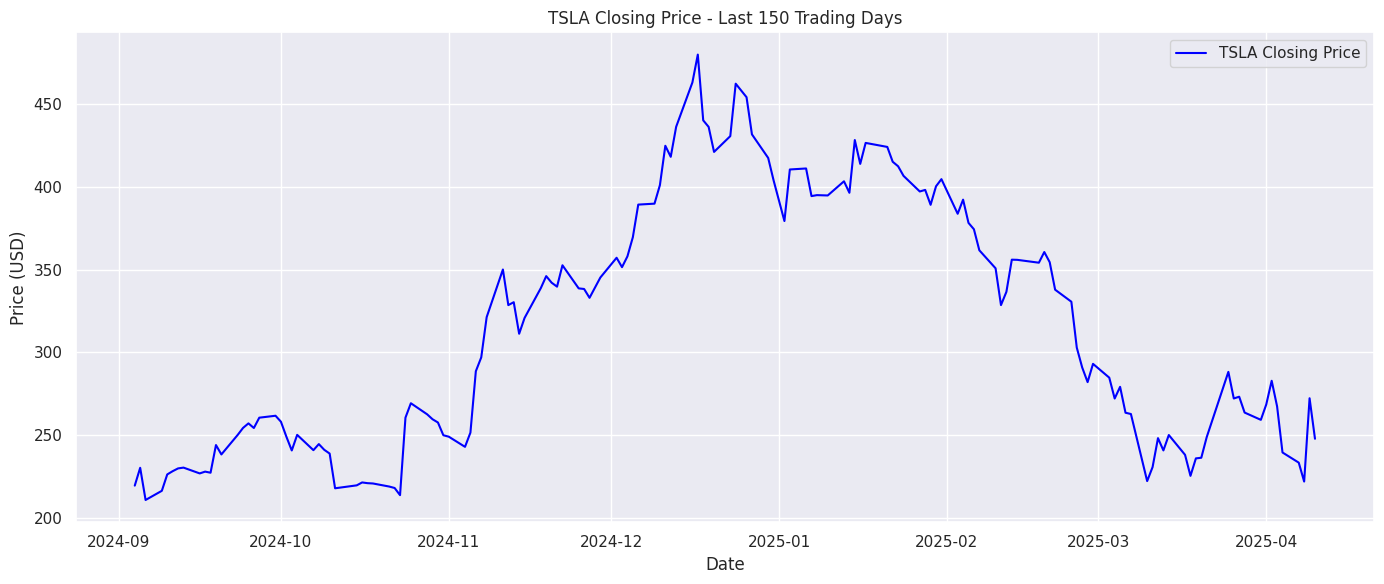

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load and clean the dataset
df = pd.read_csv("TSLA_last_150_days.csv")
df = df.drop(index=1).reset_index(drop=True)
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df = df.dropna(subset=['Close'])

# Convert 'Date' column to datetime if it exists
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])

# Plot closing price
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], label='TSLA Closing Price', color='blue')
plt.title('TSLA Closing Price - Last 150 Trading Days')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


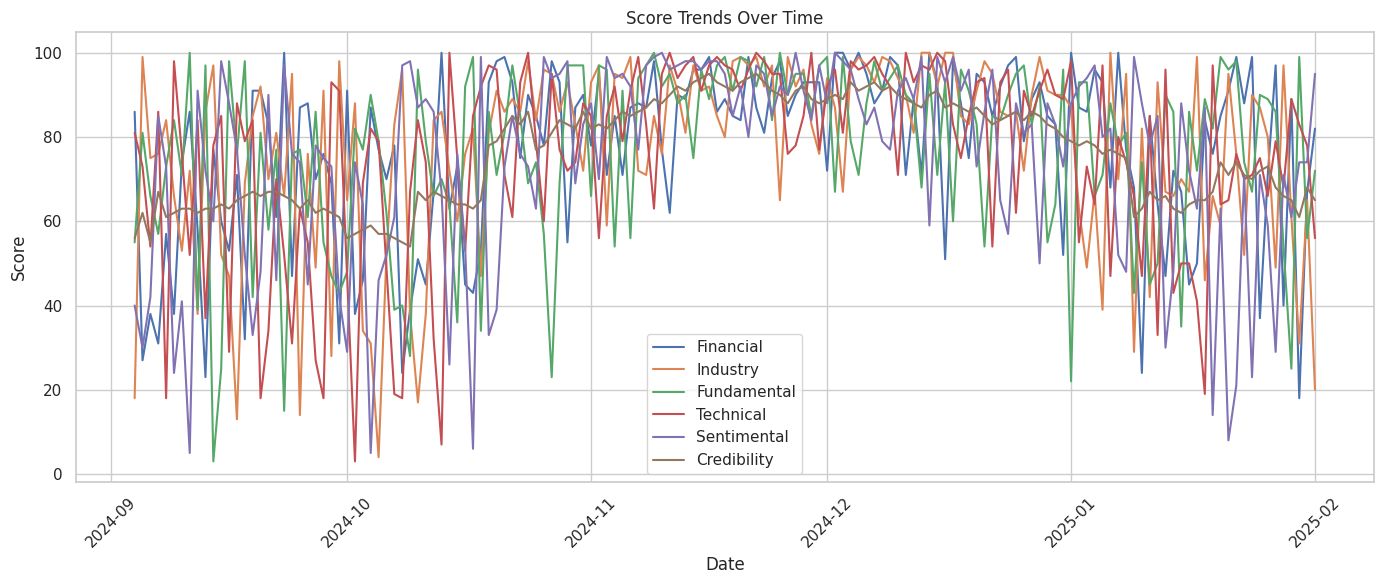

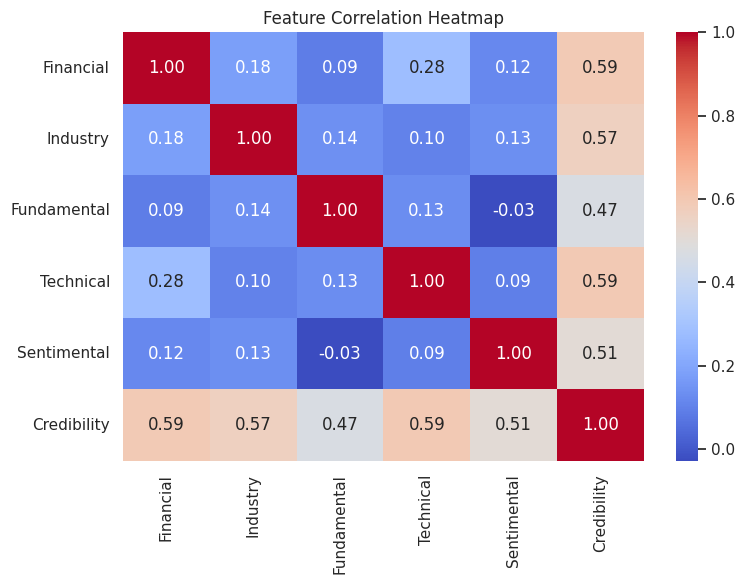

<ipython-input-1-5682811a8245>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=melted_df, x='Metric', y='Score', palette='Set2')


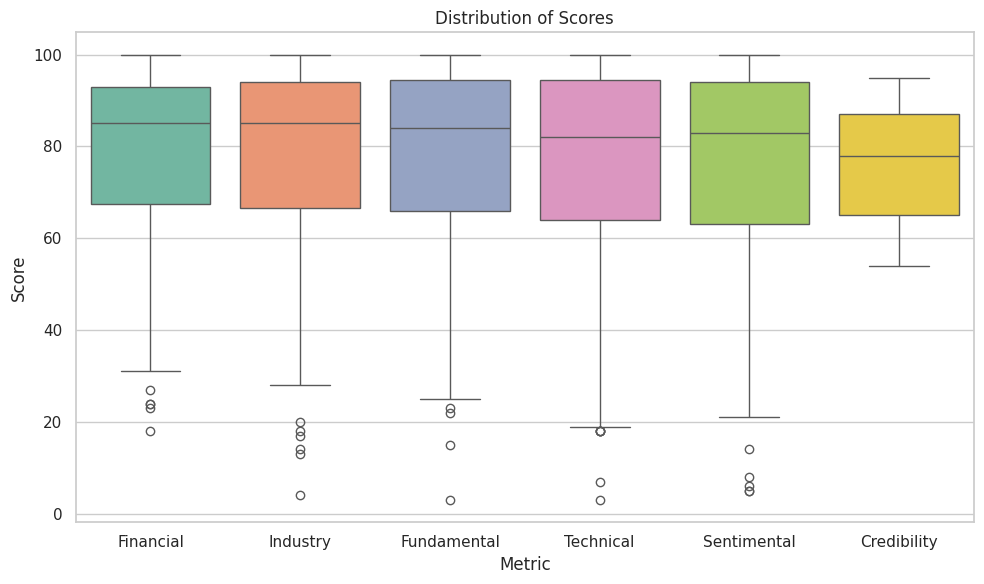

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the updated data
df = pd.read_csv("credibility.csv")

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set the plot style
sns.set(style="whitegrid")

# 1. Line Plot of all metrics over time
plt.figure(figsize=(14, 6))
for col in ['Financial', 'Industry', 'Fundamental', 'Technical', 'Sentimental', 'Credibility']:
    plt.plot(df['Date'], df[col], label=col)
plt.title('Score Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Score')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Heatmap of correlation matrix
plt.figure(figsize=(8, 6))
corr = df[['Financial', 'Industry', 'Fundamental', 'Technical', 'Sentimental', 'Credibility']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

# 3. Boxplot of the scores
plt.figure(figsize=(10, 6))
melted_df = df.melt(id_vars='Date', value_vars=['Financial', 'Industry', 'Fundamental', 'Technical', 'Sentimental', 'Credibility'],
                    var_name='Metric', value_name='Score')
sns.boxplot(data=melted_df, x='Metric', y='Score', palette='Set2')
plt.title("Distribution of Scores")
plt.tight_layout()
plt.show()


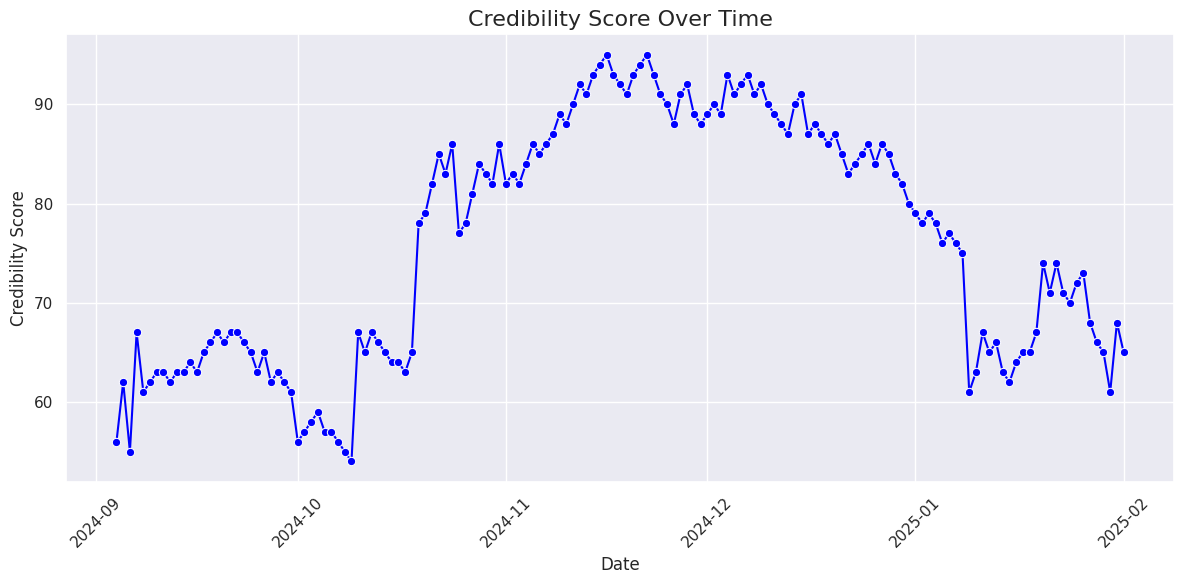

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("credibility.csv")

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set style
sns.set(style="darkgrid")

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Credibility', data=df, marker='o', color='blue')
plt.title('Credibility Score Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Credibility Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 254ms/step - loss: 0.0604 - val_loss: 0.0194
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 0.0298 - val_loss: 0.0080
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 0.0326 - val_loss: 0.0120
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0221 - val_loss: 0.0073
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0206 - val_loss: 0.0068
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0219 - val_loss: 0.0070
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0156 - val_loss: 0.0080
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0141 - val_loss: 0.0079
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0106 - val_loss: 0.0094
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0108 - val_loss: 0.0092
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0167 - val_loss: 0.0097
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0176 - val_loss: 0.0098
Epoch 13/20

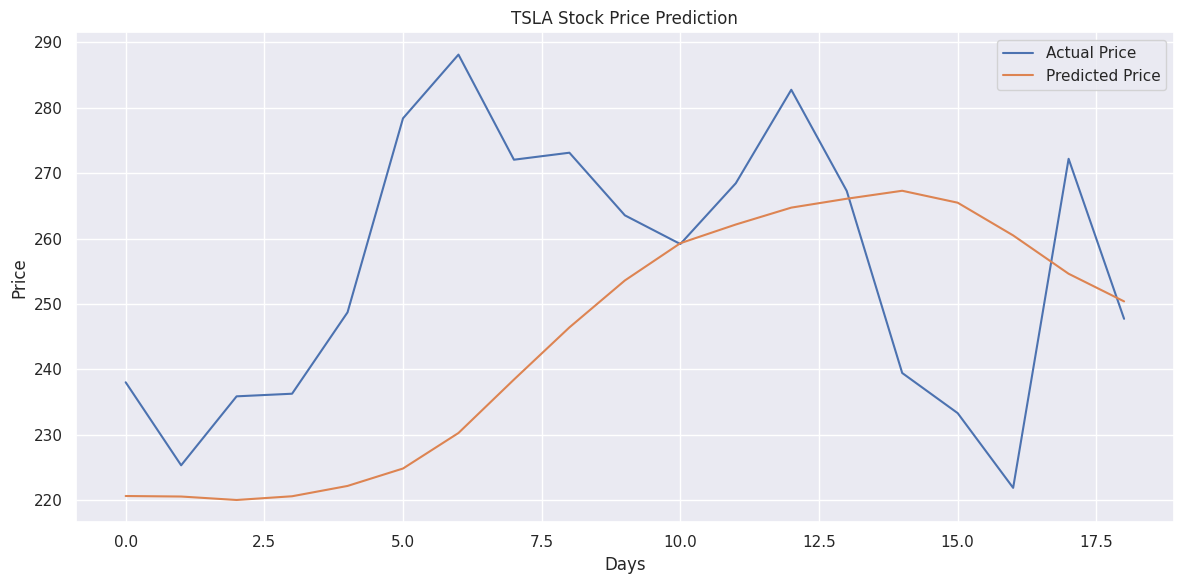

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load your CSV
df = pd.read_csv('TSLA_cleaned_last_150_days.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)

# Use selected features
features = ['Close', 'High', 'Low', 'Open', 'Volume']
data = df[features].values

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Create sequences
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(seq_length, len(data)):
        x.append(data[i - seq_length:i])
        y.append(data[i, 0])  # Predicting 'Close'
    return np.array(x), np.array(y)

seq_length = 60
x, y = create_sequences(scaled_data, seq_length)

# Train-test split
split = int(0.8 * len(x))
x_train, x_test = x[:split], x[split:]
y_train, y_test = y[:split], y[split:]

# LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=20, batch_size=16, validation_data=(x_test, y_test))

# Predict
predicted = model.predict(x_test)
predicted_prices = scaler.inverse_transform(np.concatenate([predicted, np.zeros((len(predicted), data.shape[1] - 1))], axis=1))[:, 0]
real_prices = scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((len(y_test), data.shape[1] - 1))], axis=1))[:, 0]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(real_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.title('TSLA Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 0.4593 - val_loss: 0.0385
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1273 - val_loss: 0.0345
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0252 - val_loss: 0.0919
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0321 - val_loss: 0.0320
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0145 - val_loss: 0.0204
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0184 - val_loss: 0.0264
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0146 - val_loss: 0.0399
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0124 - val_loss: 0.0376
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0121 - val_loss: 0.0291
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0121 - val_loss: 0.0298
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0127 - val_loss: 0.0308
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0129 - val_loss: 0.0314
Epoch 13/50


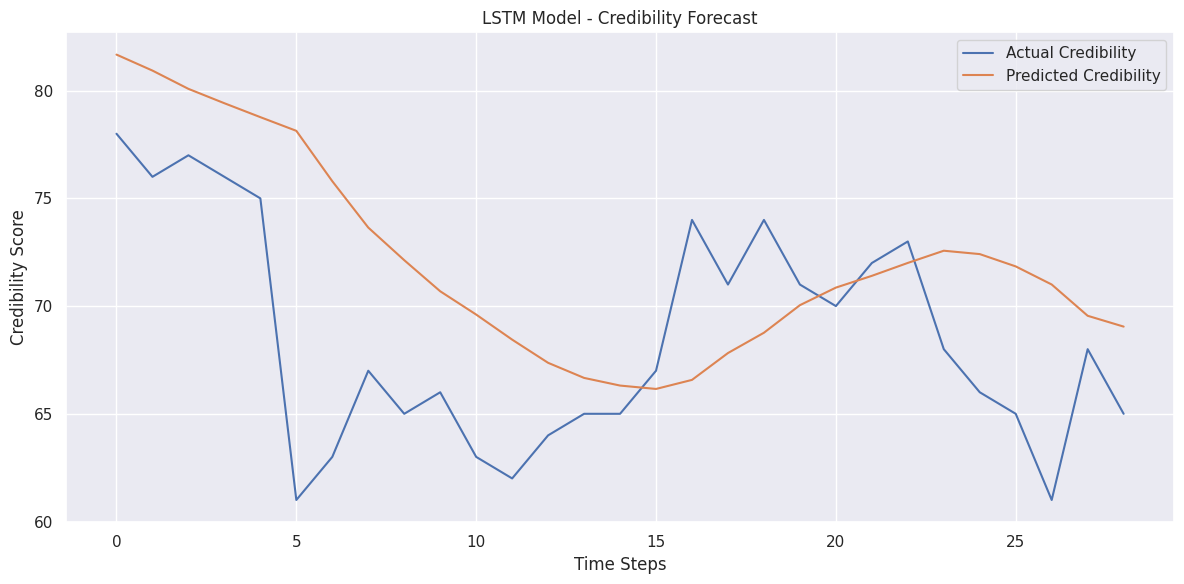

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Step 1: Load data
df = pd.read_csv("credibility.csv")

# Step 2: Convert Date to datetime and set index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Step 3: Use only the 'Credibility' column
data = df[['Credibility']]

# Step 4: Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Step 5: Prepare sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

SEQ_LENGTH = 10
X, y = create_sequences(scaled_data, SEQ_LENGTH)

# Step 6: Split into training and testing sets
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Step 7: Build the LSTM model
model = Sequential([
    LSTM(64, return_sequences=False, input_shape=(SEQ_LENGTH, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Step 8: Predict and inverse transform
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

# Step 9: Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual Credibility')
plt.plot(y_pred_inv, label='Predicted Credibility')
plt.title('LSTM Model - Credibility Forecast')
plt.xlabel('Time Steps')
plt.ylabel('Credibility Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


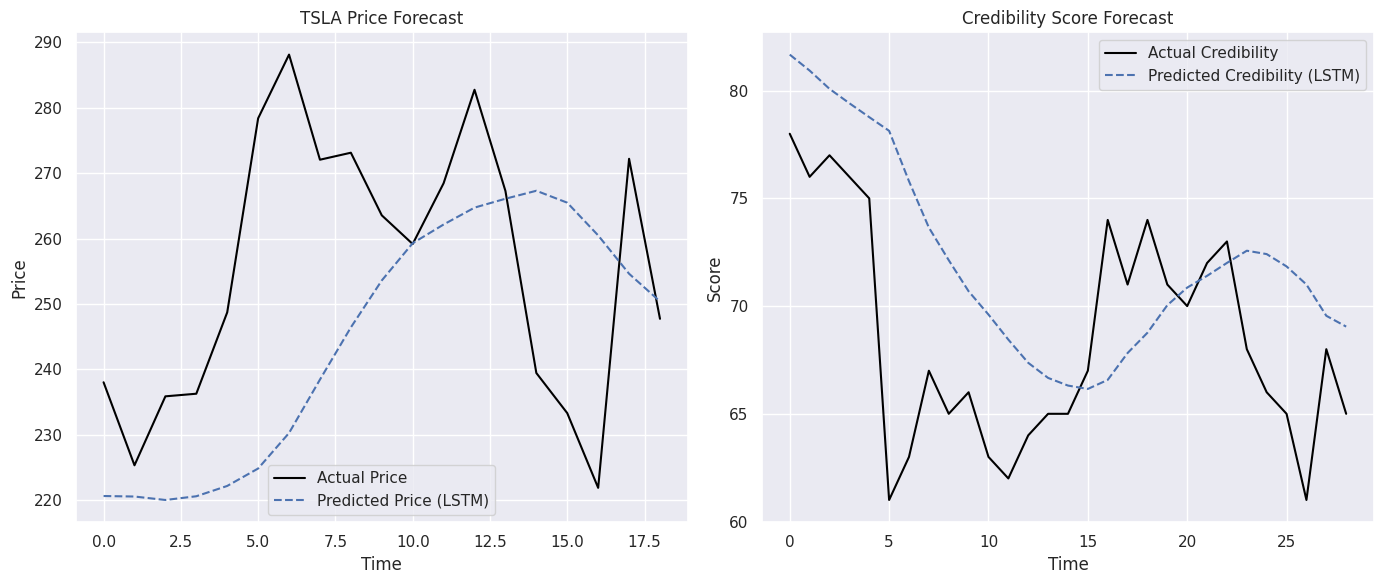

In [ ]:
# Predict on test data
predicted_prices = model.predict(X_test)

# Inverse transform to get actual price values
predicted_prices = scaler.inverse_transform(predicted_prices)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))


Pearson Correlation: 0.4331


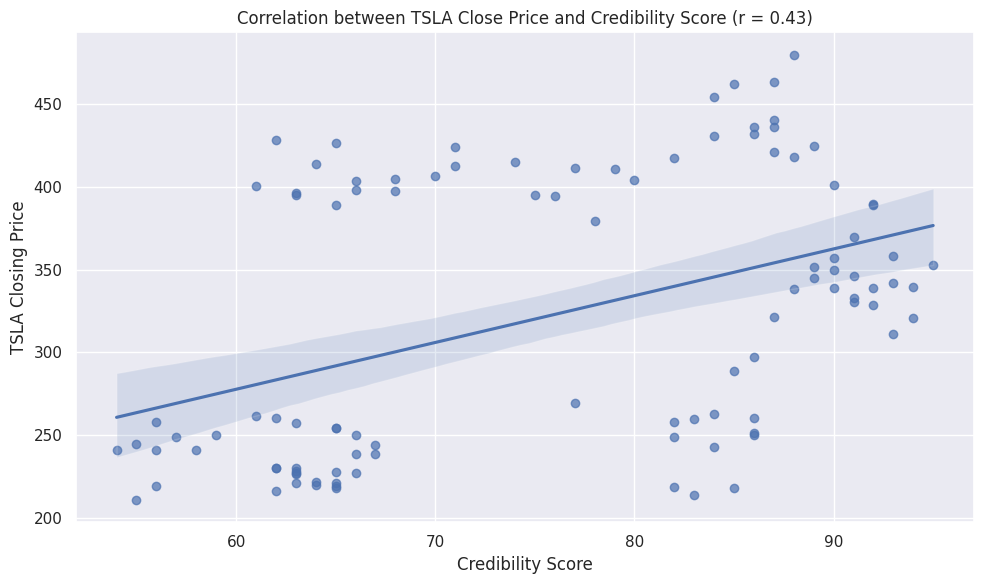

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Load both datasets
tsla_df = pd.read_csv("TSLA_cleaned_last_150_days.csv")
cred_df = pd.read_csv("credibility.csv")

# Ensure datetime format
tsla_df['Date'] = pd.to_datetime(tsla_df['Date'])
cred_df['Date'] = pd.to_datetime(cred_df['Date'])

# Merge on Date
merged = pd.merge(tsla_df[['Date', 'Close']], cred_df[['Date', 'Credibility']], on='Date', how='inner')

# Calculate correlation
corr, _ = pearsonr(merged['Close'], merged['Credibility'])
print(f"Pearson Correlation: {corr:.4f}")

# Plot
plt.figure(figsize=(10, 6))
sns.regplot(data=merged, x='Credibility', y='Close', scatter_kws={'alpha': 0.7})
plt.title(f'Correlation between TSLA Close Price and Credibility Score (r = {corr:.2f})')
plt.xlabel('Credibility Score')
plt.ylabel('TSLA Closing Price')
plt.grid(True)
plt.tight_layout()
plt.show()


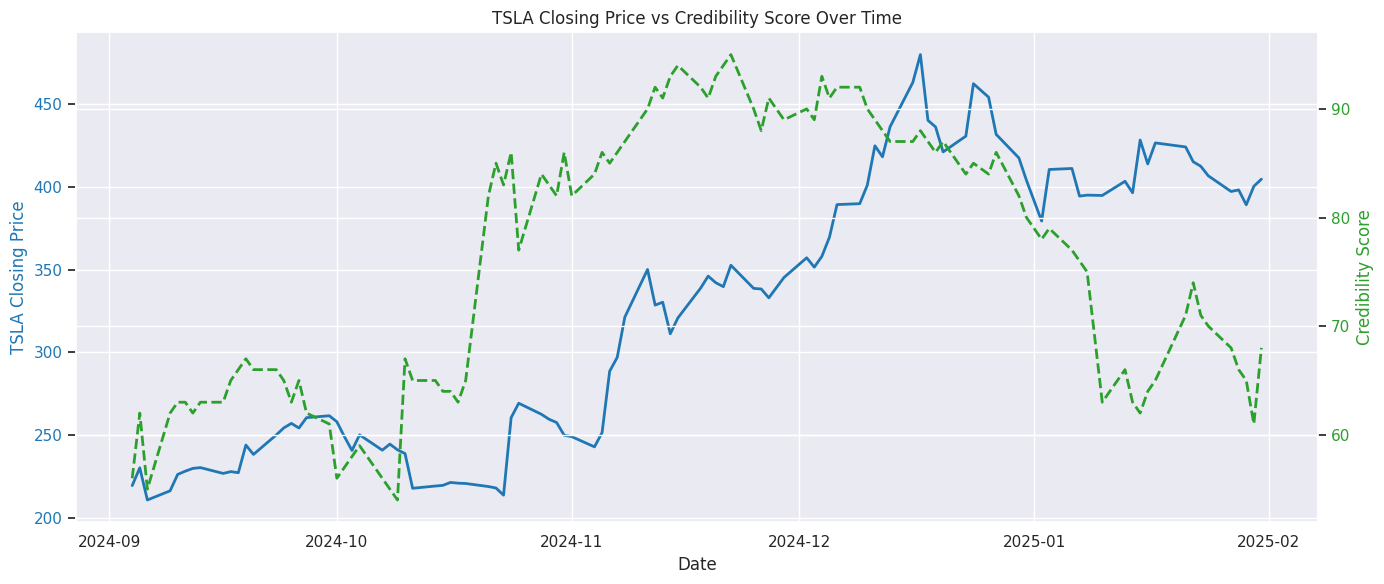

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
tsla_df = pd.read_csv("TSLA_cleaned_last_150_days.csv")
cred_df = pd.read_csv("credibility.csv")

# Ensure datetime format
tsla_df['Date'] = pd.to_datetime(tsla_df['Date'])
cred_df['Date'] = pd.to_datetime(cred_df['Date'])

# Merge datasets on Date
merged_df = pd.merge(tsla_df[['Date', 'Close']], cred_df[['Date', 'Credibility']], on='Date', how='inner')

# Plot both on same figure with twin y-axes
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot TSLA Close
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('TSLA Closing Price', color=color)
ax1.plot(merged_df['Date'], merged_df['Close'], color=color, label='TSLA Close', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)

# Plot Credibility on second axis
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Credibility Score', color=color)
ax2.plot(merged_df['Date'], merged_df['Credibility'], color=color, label='Credibility Score', linestyle='--', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)

# Title and layout
plt.title('TSLA Closing Price vs Credibility Score Over Time')
fig.tight_layout()
plt.grid(True)
plt.show()


Lengths:
Date: 19
TSLA Actual: 19
TSLA Pred: 19
Cred Actual: 29
Cred Pred: 29


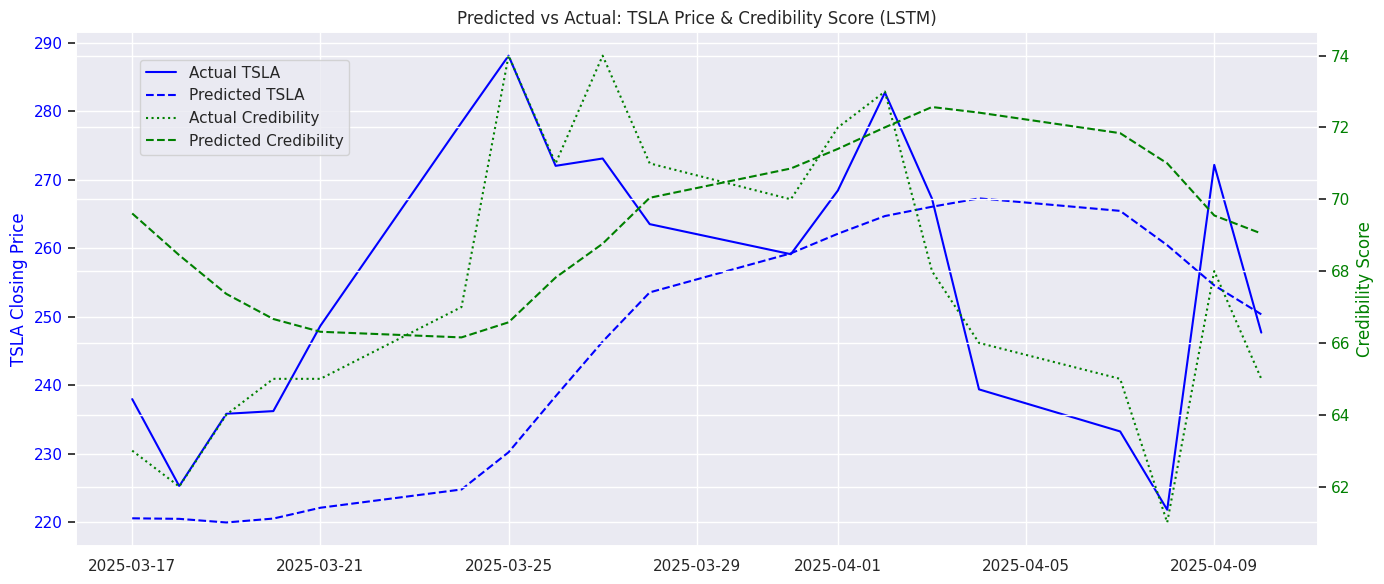

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load original data
tsla_df = pd.read_csv("TSLA_cleaned_last_150_days.csv")
cred_df = pd.read_csv("credibility.csv")

tsla_df['Date'] = pd.to_datetime(tsla_df['Date'])
cred_df['Date'] = pd.to_datetime(cred_df['Date'])

# Truncate dates to match test prediction length (adjust based on your SEQ_LENGTH)
# Example: if SEQ_LENGTH = 10, model predicts from day 10 onward
seq_len = 10
tsla_pred_dates = tsla_df['Date'].iloc[-len(predicted_prices):].reset_index(drop=True)
cred_pred_dates = cred_df['Date'].iloc[-len(y_pred_inv):].reset_index(drop=True)


# Step 1: Find lengths of each series
len_date = len(tsla_pred_dates)
len_tsla_actual = len(real_prices)
len_tsla_pred = len(predicted_prices)
len_cred_actual = len(y_test_inv)
len_cred_pred = len(y_pred_inv)

print(f"Lengths:\nDate: {len_date}\nTSLA Actual: {len_tsla_actual}\nTSLA Pred: {len_tsla_pred}\nCred Actual: {len_cred_actual}\nCred Pred: {len_cred_pred}")

# Step 2: Get the smallest length among them
min_len = min(len_date, len_tsla_actual, len_tsla_pred, len_cred_actual, len_cred_pred)

# Step 3: Truncate all to min_len
result_df = pd.DataFrame({
    'Date': tsla_pred_dates[:min_len].reset_index(drop=True),
    'Actual_TSLA': real_prices[-min_len:].flatten(),
    'Predicted_TSLA': predicted_prices[-min_len:].flatten(),
    'Actual_Cred': y_test_inv[-min_len:].flatten(),
    'Predicted_Cred': y_pred_inv[-min_len:].flatten()
})



# Plotting
fig, ax1 = plt.subplots(figsize=(14, 6))

# TSLA price - left y-axis
ax1.plot(result_df['Date'], result_df['Actual_TSLA'], color='blue', label='Actual TSLA')
ax1.plot(result_df['Date'], result_df['Predicted_TSLA'], color='blue', linestyle='--', label='Predicted TSLA')
ax1.set_ylabel('TSLA Closing Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Credibility score - right y-axis
ax2 = ax1.twinx()
ax2.plot(result_df['Date'], result_df['Actual_Cred'], color='green', linestyle=':', label='Actual Credibility')
ax2.plot(result_df['Date'], result_df['Predicted_Cred'], color='green', linestyle='--', label='Predicted Credibility')
ax2.set_ylabel('Credibility Score', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Title and legend
plt.title('Predicted vs Actual: TSLA Price & Credibility Score (LSTM)')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
!pip uninstall -y pmdarima
!pip install numpy==1.23.5 pmdarima --no-cache-dir


Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 25.7 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

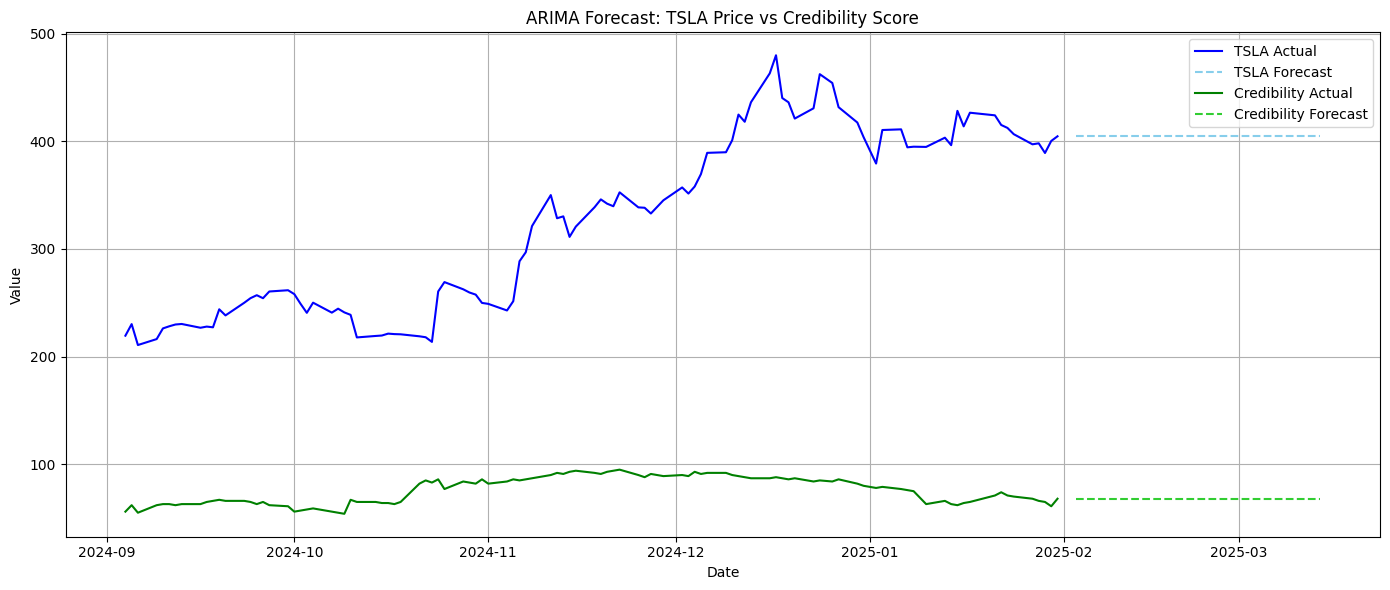

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

# Load TSLA data
tsla_df = pd.read_csv('TSLA_cleaned_last_150_days.csv')
tsla_df['Date'] = pd.to_datetime(tsla_df['Date'])
tsla_df.set_index('Date', inplace=True)

# Load Credibility data
cred_df = pd.read_csv('credibility.csv')
cred_df['Date'] = pd.to_datetime(cred_df['Date'])
cred_df.set_index('Date', inplace=True)

# Align both series by date
common_dates = tsla_df.index.intersection(cred_df.index)
tsla_series = tsla_df.loc[common_dates]['Close']
cred_series = cred_df.loc[common_dates]['Credibility']

# Fit ARIMA to TSLA
tsla_auto = auto_arima(tsla_series, seasonal=False, trace=False)
tsla_model = ARIMA(tsla_series, order=tsla_auto.order)
tsla_fit = tsla_model.fit()

# Fit ARIMA to Credibility
cred_auto = auto_arima(cred_series, seasonal=False, trace=False)
cred_model = ARIMA(cred_series, order=cred_auto.order)
cred_fit = cred_model.fit()

# Forecast next 30 steps
n_forecast = 30
tsla_forecast = tsla_fit.forecast(steps=n_forecast)
cred_forecast = cred_fit.forecast(steps=n_forecast)

# Create forecast date index
last_date = common_dates.max()
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_forecast, freq='B')

# Plotting both forecasts
plt.figure(figsize=(14, 6))

plt.plot(tsla_series, label='TSLA Actual', color='blue')
plt.plot(forecast_dates, tsla_forecast, label='TSLA Forecast', color='skyblue', linestyle='--')

plt.plot(cred_series, label='Credibility Actual', color='green')
plt.plot(forecast_dates, cred_forecast, label='Credibility Forecast', color='limegreen', linestyle='--')

plt.title('ARIMA Forecast: TSLA Price vs Credibility Score')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

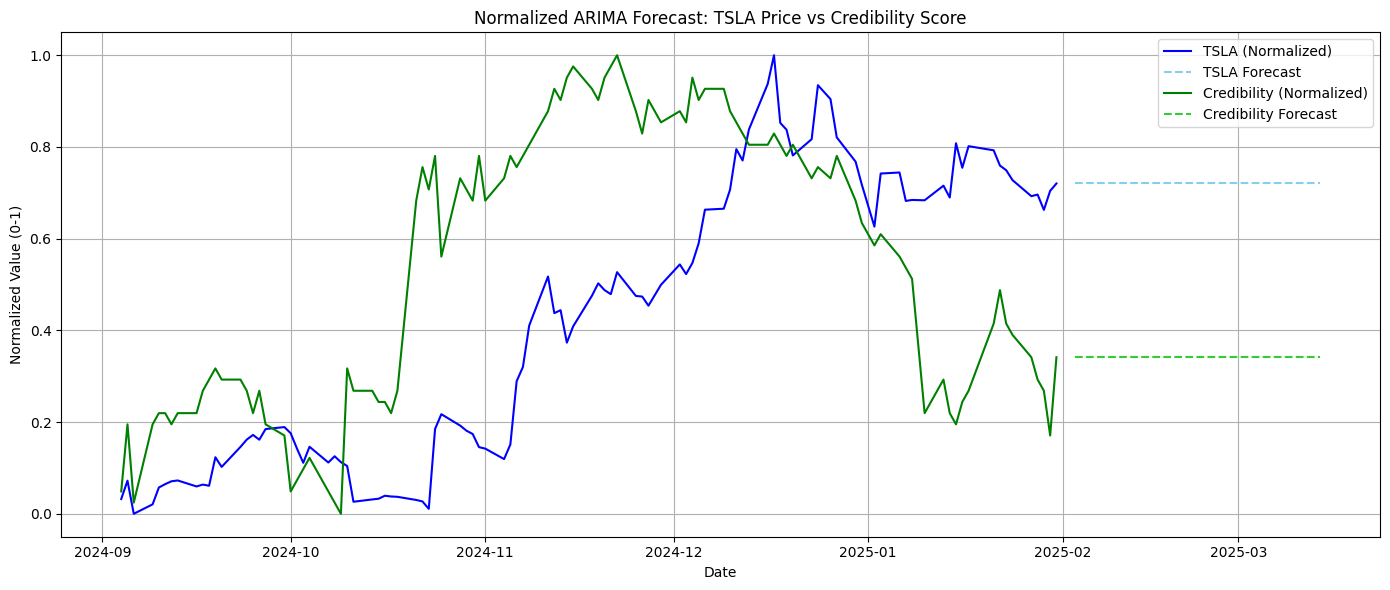

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

# Load TSLA data
tsla_df = pd.read_csv('TSLA_cleaned_last_150_days.csv')
tsla_df['Date'] = pd.to_datetime(tsla_df['Date'])
tsla_df.set_index('Date', inplace=True)

# Load Credibility data
cred_df = pd.read_csv('credibility.csv')
cred_df['Date'] = pd.to_datetime(cred_df['Date'])
cred_df.set_index('Date', inplace=True)

# Align both series by date
common_dates = tsla_df.index.intersection(cred_df.index)
tsla_series = tsla_df.loc[common_dates]['Close']
cred_series = cred_df.loc[common_dates]['Credibility']

# Normalize both series
scaler_tsla = MinMaxScaler()
scaler_cred = MinMaxScaler()

tsla_scaled = scaler_tsla.fit_transform(tsla_series.values.reshape(-1, 1)).flatten()
cred_scaled = scaler_cred.fit_transform(cred_series.values.reshape(-1, 1)).flatten()

# Fit ARIMA to normalized series
tsla_auto = auto_arima(tsla_scaled, seasonal=False, trace=False)
tsla_model = ARIMA(tsla_scaled, order=tsla_auto.order)
tsla_fit = tsla_model.fit()

cred_auto = auto_arima(cred_scaled, seasonal=False, trace=False)
cred_model = ARIMA(cred_scaled, order=cred_auto.order)
cred_fit = cred_model.fit()

# Forecast next 30 business days
n_forecast = 30
tsla_forecast = tsla_fit.forecast(steps=n_forecast)
cred_forecast = cred_fit.forecast(steps=n_forecast)

# Create forecast date index
last_date = common_dates.max()
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_forecast, freq='B')

# Plotting normalized series
plt.figure(figsize=(14, 6))

plt.plot(tsla_series.index, tsla_scaled, label='TSLA (Normalized)', color='blue')
plt.plot(forecast_dates, tsla_forecast, label='TSLA Forecast', color='skyblue', linestyle='--')

plt.plot(cred_series.index, cred_scaled, label='Credibility (Normalized)', color='green')
plt.plot(forecast_dates, cred_forecast, label='Credibility Forecast', color='limegreen', linestyle='--')

plt.title('Normalized ARIMA Forecast: TSLA Price vs Credibility Score')
plt.xlabel('Date')
plt.ylabel('Normalized Value (0-1)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


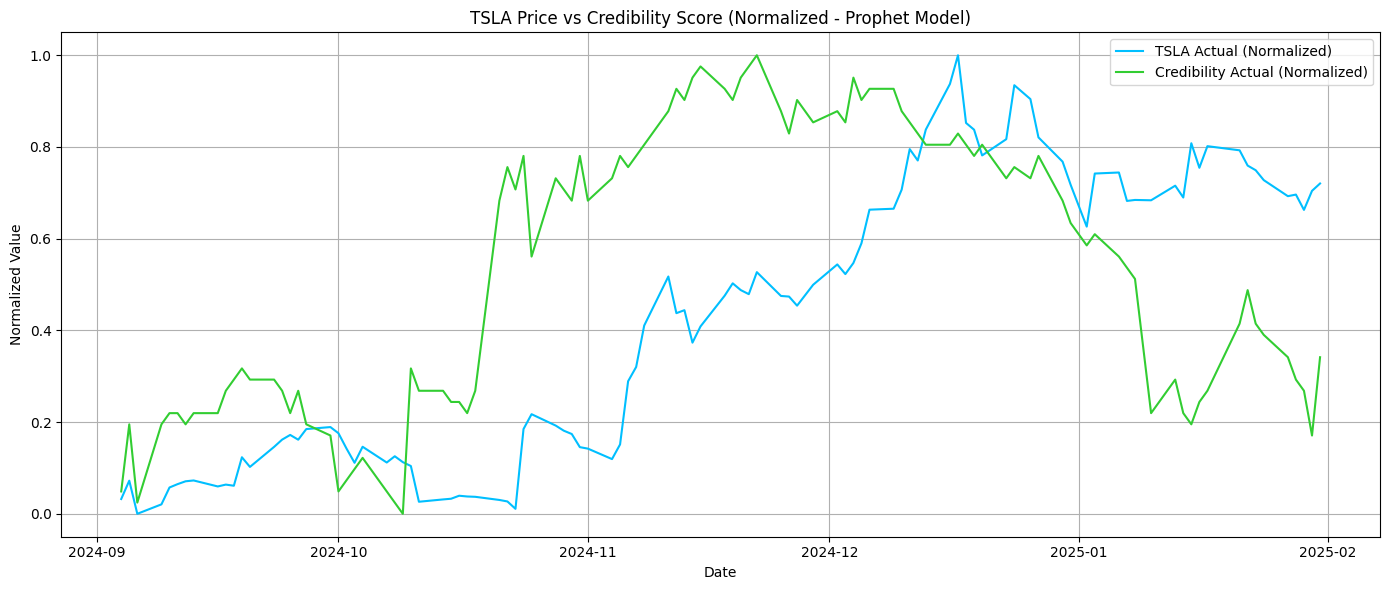

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.preprocessing import MinMaxScaler

# Load the data
tsla_df = pd.read_csv('TSLA_cleaned_last_150_days.csv')
cred_df = pd.read_csv('credibility.csv')

# Convert 'Date' to datetime
tsla_df['Date'] = pd.to_datetime(tsla_df['Date'])
cred_df['Date'] = pd.to_datetime(cred_df['Date'])

# Merge on common dates
merged_df = pd.merge(tsla_df[['Date', 'Close']], cred_df[['Date', 'Credibility']], on='Date')
merged_df = merged_df.dropna()
merged_df = merged_df.drop_duplicates(subset='Date')

# Prepare TSLA and Credibility data
df_tsla = merged_df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
df_cred = merged_df[['Date', 'Credibility']].rename(columns={'Date': 'ds', 'Credibility': 'y'})

# Normalize
scaler_tsla = MinMaxScaler()
scaler_cred = MinMaxScaler()

df_tsla['y_norm'] = scaler_tsla.fit_transform(df_tsla[['y']])
df_cred['y_norm'] = scaler_cred.fit_transform(df_cred[['y']])

# Plot normalized actual values
plt.figure(figsize=(14, 6))
plt.plot(df_tsla['ds'], df_tsla['y_norm'], label='TSLA Actual (Normalized)', color='deepskyblue')
plt.plot(df_cred['ds'], df_cred['y_norm'], label='Credibility Actual (Normalized)', color='limegreen')

plt.title("TSLA Price vs Credibility Score (Normalized - Prophet Model)")
plt.xlabel("Date")
plt.ylabel("Normalized Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


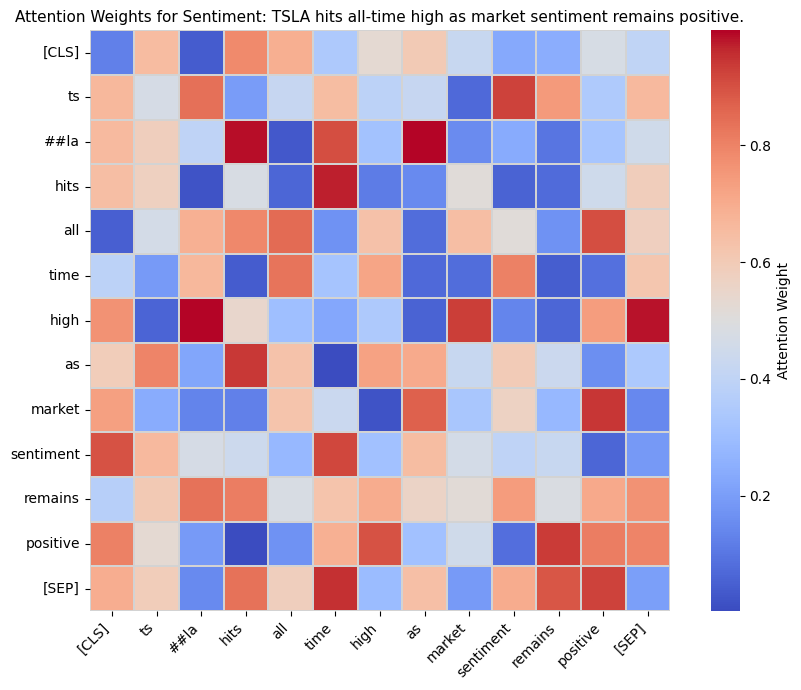

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Example attention weights (replace with actual values)
attention = np.random.rand(14, 14)  # shape should match the number of tokens
tokens = ['[CLS]', 'ts', '##la', 'hits', 'all', 'time', 'high', 'as', 'market', 'sentiment', 'remains', 'positive', '[SEP]']

# Plot with a light background and 'coolwarm' colormap
plt.figure(figsize=(9, 7))
sns.heatmap(attention[:len(tokens), :len(tokens)],
            xticklabels=tokens,
            yticklabels=tokens,
            cmap='coolwarm',        # Light-friendly colormap with nice contrast
            square=True,
            linewidths=0.3,
            linecolor='lightgrey',
            cbar_kws={"label": "Attention Weight"})

plt.title("Attention Weights for Sentiment: TSLA hits all-time high as market sentiment remains positive.", fontsize=11)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
